<a href="https://colab.research.google.com/github/vineet1947/general_code-_files-/blob/main/fashion_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf

In [12]:
from tensorflow import keras


In [13]:
l0 = tf. keras.layers.Dense(units=  4  , input_shape  = [1]) 
l1 = tf.keras.layers.Dense(units = 4) 
l2 = tf.keras.layers.Dense(units = 1)

In [14]:
model = tf.keras.Sequential([l0 , l1 ,  l2]) 
model.compile(loss = 'mean_squared_error' , optimizer = tf.keras.optimizers.Adam(0.1) )

In [15]:
import numpy as np

In [16]:
celcius = np.array([-40 ,  -10 , 0 , 8 , 15  , 22 , 38] , dtype= float) 
far = np.array([-40 ,  14 , 32, 46 , 59 , 72 , 100] , dtype  = float )

In [19]:
model.fit(celcius  , far  , epochs = 500 , verbose = False)

In [21]:
model.predict([100])

array([[211.74744]], dtype=float32)

In [22]:
l0.get_weights()

[array([[-0.18372269,  0.531092  , -0.0732225 ,  0.29199383]],
       dtype=float32),
 array([-0.597703 ,  3.7986794, -1.6525108,  3.2896533], dtype=float32)]

In [26]:
l1.get_weights()

[array([[ 0.30075464, -0.7102446 , -0.07773702, -0.03927414],
        [ 0.7790308 , -0.28473753,  0.0844007 , -1.0468776 ],
        [-0.47514254,  0.6858956 , -0.5703187 ,  0.20308785],
        [-0.11247142,  1.1141406 ,  1.0506816 , -0.33224645]],
       dtype=float32),
 array([ 3.1607425,  1.5175419,  3.632065 , -3.6449358], dtype=float32)]

In [25]:
l2.get_weights()

[array([[ 0.8319738],
        [ 0.6633072],
        [ 0.9492451],
        [-1.4264405]], dtype=float32), array([3.5670154], dtype=float32)]

#new Section

In [1]:
!pip install -U tensorflow_datasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.3 MB/s 
     |████████████████████████████████| 98 kB 7.3 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [4]:
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from future import absolute_import   ,division , print_function

ImportError: ignored

In [7]:
import tensorflow as tf 
import tensorflow_datasets as tfds 

In [8]:
import numpy as np
import math 
import matplotlib.pyplot as plt 

In [9]:
import tqdm 
import tqdm.auto 
tqdm.tqdm = tqdm.auto.tqdm

In [10]:
tf.enable_eager_execution()

AttributeError: ignored

In [12]:
dataset , metadata  = tfds.load('fashion_mnist' , as_supervised = True , with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF73J5L/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF73J5L/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [13]:
train_dataset ,  test_dataset  = dataset['train'],  dataset['test']

In [18]:
class_names =  ['T-shirt/top' , 'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt' , 'Sneakers' , 'Bag' , 'Anklr_boots' ]

In [20]:
num_train_examples = metadata.splits['train'].num_examples 
num_test_examples  = metadata.splits['test'].num_examples 
print('nUmber of training examples : {}'.format(num_train_examples))
print("number of test examples : {}".format(num_test_examples))

nUmber of training examples : 60000
number of test examples : 10000


#Preprocess Data

In [22]:
def normalize(images , labels ) : 
  images = tf.cast(images , tf.float32) 
  images/= 255 
  return images , labels 

train_dataset = train_dataset.map(normalize) 
train_dataset = test_dataset.map(normalize)


In [25]:
for image , label in test_dataset.take(1) : 
  break
image = image.numpy().reshape((28,  28))

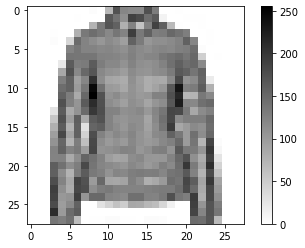

In [26]:
plt.figure() 
plt.imshow(image , cmap  = plt.cm.binary) 
plt.colorbar() 
plt.grid(False) 
plt.show()

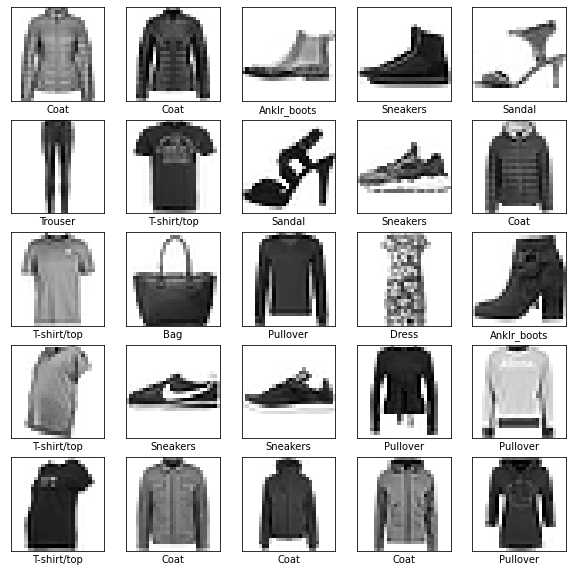

In [27]:
plt.figure(figsize = (10  , 10)) 
i = 0 

for (image , label) in test_dataset.take(25) :
  image = image.numpy().reshape((28  , 28)) 
  plt.subplot(5 ,  5 , i+1) 
  plt.xticks([]) 
  plt.yticks([]) 
  plt.grid(False) 
  plt.imshow(image , cmap = plt.cm.binary) 
  plt.xlabel(class_names[label]) 
  i+= 1 

plt.show()

#Build Model

In [29]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28  , 28 , 1)) , 
                             tf.keras.layers.Dense(128 , activation  = tf.nn.relu) , 
                             tf.keras.layers.Dense(10 , activation=  tf.nn.softmax)
])

#complie model 

In [30]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , 
              metrics = ['accuracy']) 


#Training the Model 

In [31]:
BATCH_SIZE = 32 
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE) 
test_dataset = test_dataset.batch(BATCH_SIZE)

In [35]:
model.fit(train_dataset,  epochs  = 5 , steps_per_epoch = math.ceil(num_train_examples /  BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4806 - accuracy: 0.8299
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3139 - accuracy: 0.8869
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2422 - accuracy: 0.9123
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1936 - accuracy: 0.9290
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1536 - accuracy: 0.9445


In [36]:
test_loss , test_accuracy = model.evaluate(test_dataset  , steps = math.ceil(num_test_examples / 32)) 
print("Accuracy on test dataset : " , test_accuracy) 

313/313 [==============================] - 1s 2ms/step - loss: 23.0678 - accuracy: 0.9296
Accuracy on test dataset :  0.9296000003814697


In [37]:
for test_images , test_labels in test_dataset.take(1)  :
  test_images = test_images.numpy() 
  test_labels = test_labels.numpy() 
  predictions= model.predict(test_images)

In [38]:
predictions.shape

(32, 10)

In [40]:
predictions[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [41]:
np.argmax(predictions[0]) 


4

In [42]:
test_labels[0]

4